Analyzing data from data frames using Pandas(Covid csv file)

In [1]:
import pandas as pd

In [2]:
from urllib.request import urlretrieve

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'C:/Users/HAMZA/Downloads/italy-covid-daywise.csv')

('C:/Users/HAMZA/Downloads/italy-covid-daywise.csv',
 <http.client.HTTPMessage at 0x1cbaad3cd40>)

In [4]:
covid_df = pd.read_csv('C:/Users/HAMZA/Downloads/italy-covid-daywise.csv')

In [5]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [7]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [8]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [9]:
covid_df.shape

(248, 4)

In [10]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [11]:
type(covid_df.loc[243])

pandas.core.series.Series

In [12]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [13]:
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [14]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [15]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
90,2020-03-30,5217.0,758.0,NaN
156,2020-06-04,321.0,71.0,27451.0
60,2020-02-29,238.0,4.0,NaN
232,2020-08-19,401.0,5.0,41290.0
167,2020-06-15,338.0,44.0,17463.0
190,2020-07-08,137.0,30.0,28679.0
243,2020-08-30,1444.0,1.0,53541.0
46,2020-02-15,0.0,0.0,NaN
194,2020-07-12,188.0,7.0,23061.0
92,2020-04-01,4053.0,839.0,NaN


Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?

In [16]:
Total_report_cases = covid_df.new_cases.sum()
Total_deaths = covid_df.new_deaths.sum()

In [17]:
print("New Cases = {} : New Deaths = {}".format(Total_report_cases,Total_deaths))

New Cases = 271515.0 : New Deaths = 35497.0


Q: What is the overall death rate (ratio of reported deaths to reported cases)?

In [18]:
death_rate = (covid_df.new_deaths.sum() / covid_df.new_cases.sum())*100

In [19]:
print("Death Ratio = {:.2f}%".format(death_rate))

Death Ratio = 13.07%


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**

In [20]:
inital_tests = 935310
total_tests = inital_tests+covid_df.new_tests.sum()


In [21]:
total_tests

5214766.0

**Q: What fraction of tests returned a positive result?**

In [22]:
positive_rate = Total_report_cases / total_tests
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


**days which had more than 1000 reported cases**

In [23]:
high_cases = covid_df[covid_df.new_cases>1000]
high_cases

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [24]:
positive_rate

0.05206657403227681

Working with dates

In [25]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [26]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [27]:
covid_df['date']


0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [28]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [29]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [30]:
#Number of cases,deaths and test for month may
covid_df[covid_df.month==5][["new_cases","new_deaths","new_tests"]].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

check if the number of cases reported on Sundays is higher than the average number of cases reported every day. 

In [31]:
# Overall average
covid_df.new_cases.mean()

1094.8185483870968

In [32]:
round(covid_df[covid_df.weekday== 6].new_cases.mean(),2)

1247.26

**Grouping and aggregation**

create a new dataframe with month-wise data

In [33]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [34]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [35]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [36]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,259.066667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [37]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [38]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [39]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + inital_tests

**Merging data from multiple sources**

In [40]:
url = 'https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv'
urlretrieve(url,'C:/Users/HAMZA/Downloads/locations.csv')


('C:/Users/HAMZA/Downloads/locations.csv',
 <http.client.HTTPMessage at 0x1cbabc94d40>)

In [41]:
locations_df = pd.read_csv('C:/Users/HAMZA/Downloads/locations.csv') 

In [42]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [43]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [44]:
covid_df['location'] = 'Italy'

In [45]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


We can now add the columns from locations_df into covid_df using the merge method.
The merge function from the pandas library to combine two DataFrames, covid_df and locations_df, based on a common column called location.

In [46]:
merged_df = covid_df.merge(locations_df, on="location")

In [47]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within covid_df. If the covid_df data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [49]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [51]:
merged_df['Deaths_per_million'] =merged_df.total_deaths * 1e6 / merged_df.population

In [53]:
merged_df['test_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [54]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,Deaths_per_million,test_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,586.998461,NaN


Final Result

**display format without modifying the actual data, you can set the display options in pandas:**

or you can change data field directly 

df['value'] = df['value'].round(2)



In [65]:
pd.options.display.float_format = "{:.2f}".format

In [63]:
result_df =merged_df[[
                    'date',
                    'new_cases', 
                    'total_cases', 
                    'new_deaths', 
                    'total_deaths', 
                    'new_tests', 
                    'total_tests', 
                    'cases_per_million', 
                    'Deaths_per_million', 
                    'test_per_million'
                    ]]

In [64]:
result_df.loc[113:120]

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,Deaths_per_million,test_per_million
113,2020-04-22,2729.00,183957.00,534.00,24648.00,44248.00,1015494.00,3042.53,407.66,16795.62
114,2020-04-23,3370.00,187327.00,437.00,25085.00,37083.00,1052577.00,3098.27,414.89,17408.95
115,2020-04-24,2646.00,189973.00,464.00,25549.00,95273.00,1147850.00,3142.03,422.56,18984.71
116,2020-04-25,3021.00,192994.00,420.00,25969.00,38676.00,1186526.00,3192.00,429.51,19624.38
117,2020-04-26,2357.00,195351.00,415.00,26384.00,24113.00,1210639.00,3230.98,436.37,20023.20
118,2020-04-27,2324.00,197675.00,260.00,26644.00,26678.00,1237317.00,3269.42,440.67,20464.43
119,2020-04-28,1739.00,199414.00,333.00,26977.00,37554.00,1274871.00,3298.18,446.18,21085.55
120,2020-04-29,2091.00,201505.00,382.00,27359.00,38589.00,1313460.00,3332.76,452.50,21723.79


**To write the data from the data frame into a file, we can use the to_csv function.**

In [67]:
result_df.to_csv(r'C:\Users\HAMZA\Documents\Python Projects\CovidDataItaly\results.csv', index=None)

**Basic Plotting with Pandas**

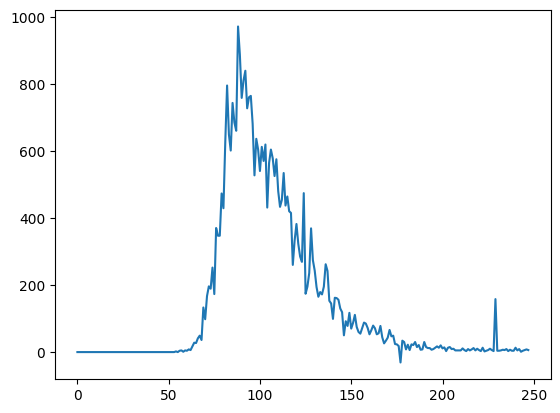

In [70]:
result_df.n.plot();

In [71]:
result_df.set_index('date', inplace=True)

In [72]:
result_df.loc['2020-09-01']

new_cases                996.00
total_cases           269214.00
new_deaths                 6.00
total_deaths           35483.00
new_tests              54395.00
total_tests          5214766.00
cases_per_million       4452.63
Deaths_per_million       586.87
test_per_million       86248.90
Name: 2020-09-01 00:00:00, dtype: float64

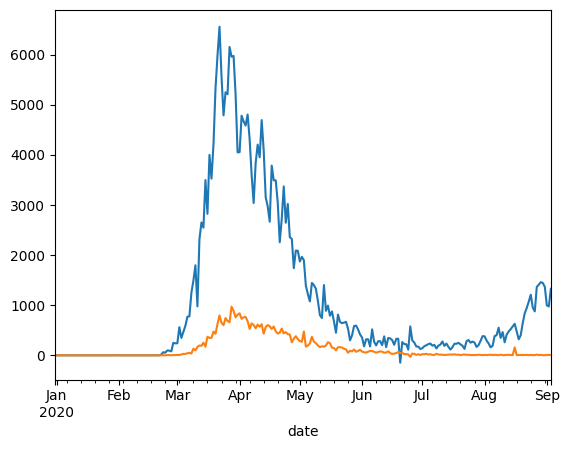

In [73]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

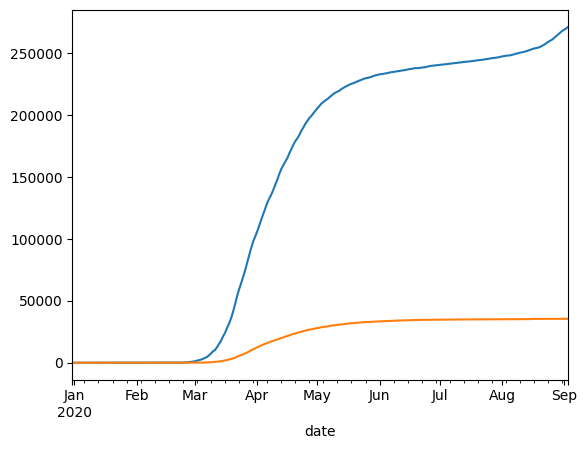

In [74]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

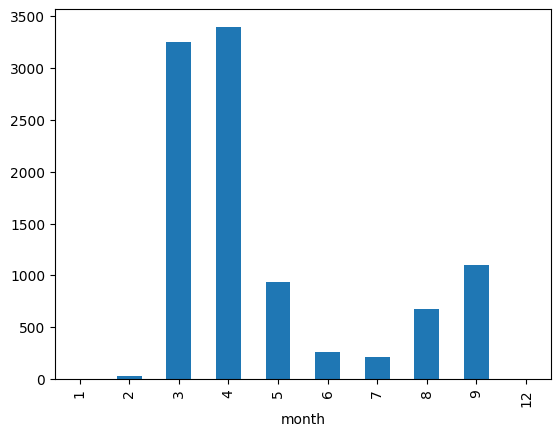

In [75]:
covid_month_df.new_cases.plot(kind='bar');